# 27 获得前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

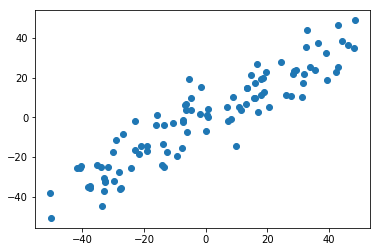

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        
        cur_iter += 1
        
    return w

In [6]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.75856132, 0.65160166])

In [7]:
X2 = X - X.dot(w).reshape(-1, 1) * w

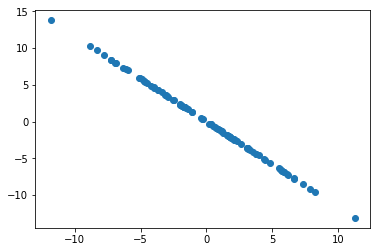

In [8]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [9]:
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.65160578, -0.75855779])

In [10]:
w.dot(w2)

5.418793682432366e-06

In [11]:
def first_n_components(n, X,eta=0.01, n_iters = 1e4, epsilon=1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [12]:
first_n_components(2, X)

[array([0.7585613 , 0.65160169]), array([ 0.65160726, -0.75855651])]

In [14]:
first_n_components(10, X)

[array([0.75856113, 0.65160188]),
 array([ 0.65160718, -0.75855658]),
 array([0.69099117, 0.7228632 ]),
 array([0.54149358, 0.84070488]),
 array([0.34196947, 0.93971106]),
 array([0.68316827, 0.73026099]),
 array([0.74536008, 0.6666621 ]),
 array([0.85753185, 0.51443088]),
 array([0.9867976 , 0.16195834]),
 array([0.9230347, 0.3847167])]